# Autoencoder para reducir imagenes a espacio latente

## Referencias

1. Basado en  [Tutorial Tensorflow: Clasificacion Basica: Predecir una imagen de moda](https://www.tensorflow.org/tutorials/keras/classification?hl=es-419).
2. Basado en Autoencoder as a Classifier using Fashion-MNIST Dataset](https://www.datacamp.com/community/tutorials/autoencoder-classifier-python)

## Introducción

La idea es usar un autoencoder para representar las imágenes en un espacio latente de menor dimensionalidad. Para ello se entrena un autoencoder y se usa la representación latente para proyectar las imagenes en un plano factorial y revisar su agrupamiento. 

## Importa módulos

In [36]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
  
from keras.layers import *
from keras.models import Model, load_model
from keras.datasets import mnist
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers
from keras import optimizers
from keras import backend as K
import scipy
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea
from tensorflow.keras.datasets import fashion_mnist 
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense, Input, Conv2D, Conv2DTranspose, Flatten, Reshape 
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint 

### Lee datos

In [5]:
(x_train, y_train), (x_test, y_test) =  fashion_mnist.load_data()
#(x_train, _), (x_test, _) =  cifar100.load_data() 
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


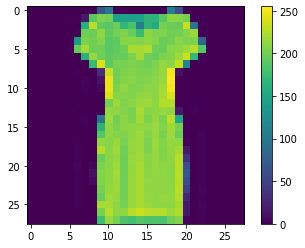

In [6]:
plt.figure()
plt.imshow(x_train[20])
plt.colorbar()
plt.grid(False)
plt.show()

Normalizar los datos

In [7]:
x_train = np.array(x_train).reshape(-1, 28, 28) / 255.0
x_test = np.array(x_test).reshape(-1, 28, 28) / 255.0

Visualizar 10 imágenes

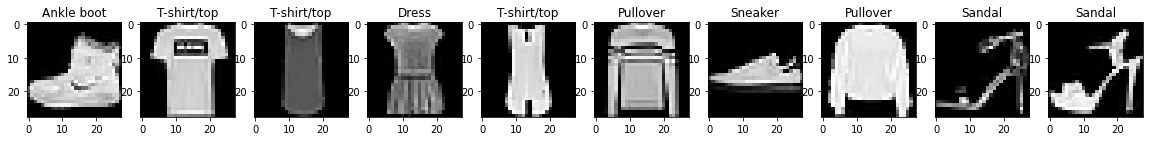

In [8]:
labeldict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    ax[i].imshow(x_train[i], cmap='gray')
    ax[i].set_title(labeldict[y_train[i]])

In [9]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

Se construye la arquitectura con 2 variables latentes para poder dibujarlo.

In [24]:
inputs = Input(shape=(28, 28, 1))

#########ENCODER#######

x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (2, 2), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = BatchNormalization()(x)
x = Conv2D(16, (2, 2), activation='relu', padding='same')(x)
x = Conv2D(4, (2, 2), activation='relu', padding='same')(x)
x = Conv2D(1, (2, 2), activation='relu', padding='same')(x)
x = Flatten()(x)
encoded = Dense(2, activation='relu')(x)    ####### 2 VARIABLES LATENTES #######

encoder = Model(inputs=inputs, outputs=encoded)
    
encoded_inputs = Input(shape=(2,))


#####DECODER#######

x = Dense(4, activation='relu')(encoded_inputs)
x = Reshape((2, 2, 1))(x)
x = Conv2D(4, (2, 2), activation='relu', padding='same')(x)
x = Conv2D(16, (2, 2), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((7, 7))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

decoder = Model(inputs=encoded_inputs, outputs=decoded)
    
x = encoder(inputs)
x = decoder(x)
model = Model(inputs=inputs, outputs=x)

model.compile(optimizer=optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy', 'mse'])

   
history=model.fit(x_train, x_train, batch_size=256, epochs=50, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 9s 32ms/step - loss: 0.4652 - accuracy: 0.4831 - mse: 0.0757 - val_loss: 1.1445 - val_accuracy: 0.4999 - val_mse: 0.1955
Epoch 2/50
235/235 [==============================] - 7s 31ms/step - loss: 0.4067 - accuracy: 0.4915 - mse: 0.0544 - val_loss: 0.5724 - val_accuracy: 0.4982 - val_mse: 0.1052
Epoch 3/50
235/235 [==============================] - 7s 31ms/step - loss: 0.4031 - accuracy: 0.4906 - mse: 0.0530 - val_loss: 0.4278 - val_accuracy: 0.4943 - val_mse: 0.0613
Epoch 4/50
235/235 [==============================] - 7s 31ms/step - loss: 0.3994 - accuracy: 0.4929 - mse: 0.0523 - val_loss: 0.3999 - val_accuracy: 0.4937 - val_mse: 0.0514
Epoch 5/50
235/235 [==============================] - 7s 31ms/step - loss: 0.3969 - accuracy: 0.4921 - mse: 0.0512 - val_loss: 0.4043 - val_accuracy: 0.4886 - val_mse: 0.0538
Epoch 6/50
235/235 [==============================] - 7s 31ms/step - loss: 0.3960 - accuracy: 0.4924 - mse: 0.0512 - val_loss

In [12]:
print(encoder.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248  

In [13]:
print(decoder.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
reshape (Reshape)            (None, 2, 2, 1)           0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 4)           20        
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 2, 2, 16)          272       
_________________________________________________________________
batch_normalization_2 (Batch (None, 2, 2, 16)          64        
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 16)        0   

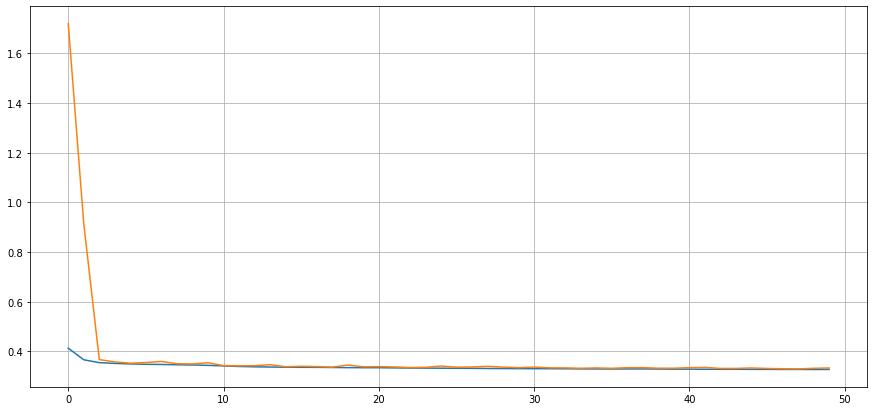

In [14]:
plt.figure(figsize=(15,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.show()

Se grafican las observaciones en el espacio latente. Se observa la agrupación de las imágenes en el espacio latente. Para ello, primero se hace una gráfica en la cual se sobrepone la imágen a las coordenadas latentes. También se hace una gráfica de las coordenadas latentes y la etiqueta. Se observa que la representación latente aparentemente captura la estructura de las imágenes porque agrupa imágenes similares o con la misma etiqueta en coordenadas cercanas en el espacio latente.

---



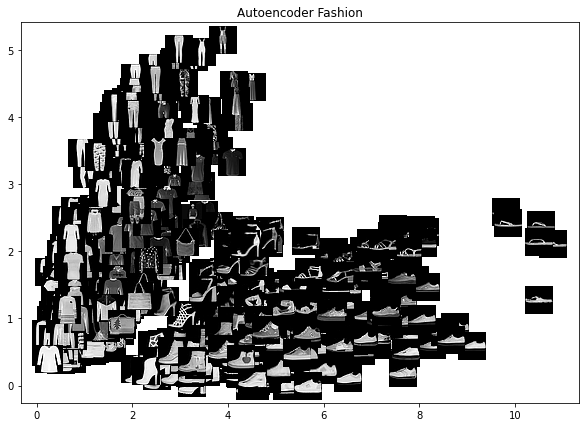

In [20]:
idx = np.random.choice(len(x_test), 1000)
inputs = x_test[idx]
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title("Autoencoder Fashion")
coords = encoder.predict(inputs)

for image, (x, y) in zip(inputs, coords):
    im = OffsetImage(image.reshape(28, 28), zoom=1, cmap='gray')
    ab = AnnotationBbox(im, (x, y), xycoords='data', frameon=False)
    ax.add_artist(ab)
    ax.update_datalim(coords)
    ax.autoscale()
    


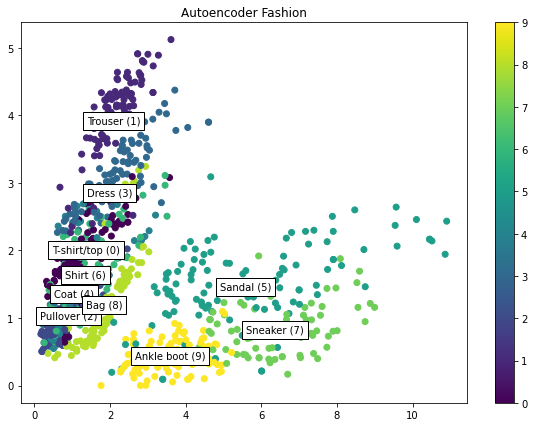

In [22]:
idx = np.random.choice(len(x_test), 1000)
inputs = x_test[idx]
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title("Autoencoder Fashion")
coords = encoder.predict(inputs)

classes = y_test[idx]
plt.scatter(coords[:, 0], coords[:, 1], c=classes)
plt.colorbar()
for i in range(10):
    class_center = np.mean(coords[classes == i], axis=0)
    text = TextArea('{} ({})'.format(labeldict[i], i))
    ab = AnnotationBbox(text, class_center, xycoords='data', frameon=True)
    ax.add_artist(ab)
plt.show()

